Look at the datasets shown here: https://www.autodesk.com/research/publications/same-stats-different-graphs

It shows why reguralisation is important.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
N = 1000
x1 = np.random.randn(N, 1)
x2 = np.random.randn(N, 1)
w1 = 2.0
w2 = 3.0
noise = np.random.randn(N, 1)
y_obs = w1*x1 + w2*x2 + noise

In [82]:
w1_hat, w2_hat = np.meshgrid(np.arange(-5, 10, 0.5), np.arange(-5, 10, 0.5))
w1_hat = w1_hat.reshape(1, -1)
w2_hat = w2_hat.reshape(1, -1)
y_pred = x1 * w1_hat + x2 * w2_hat
# y_pred.shape

In [84]:
w1_hat.shape

(1, 900)

In [83]:
y_pred.shape

(1000, 900)

In [86]:
y_obs.shape

(1000, 1)

In [87]:
error = y_pred - y_obs
error.shape

(1000, 900)

In [88]:
mse = (error ** 2).mean(axis=0)
mse.shape

(900,)

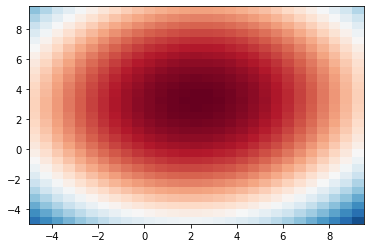

In [89]:
plt.pcolor(w1_hat.reshape(30, 30), 
           w2_hat.reshape(30, 30), 
           mse[None,:].reshape(30, 30), 
           cmap='RdBu', 
           vmin=mse.min(), vmax=mse.max())

plt.show()

## L2 Loss function/ Ridge Regression
$$
\begin{align}
\mathcal{L} &= \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda \sum_{k=1}^K w_k^2
\end{align}
$$

In [90]:
from sklearn.linear_model import Ridge, LinearRegression

In [91]:
x = np.hstack([x1, x2])
x.shape

(1000, 2)

In [93]:
model = LinearRegression(fit_intercept=False)
model.fit(x, y_obs)
model.coef_

array([[2.01769323, 3.00127312]])

In [96]:
model = Ridge(alpha=100) # 
model.fit(x, y_obs)
model.coef_

array([[1.81518535, 2.71963561]])

## Example 2

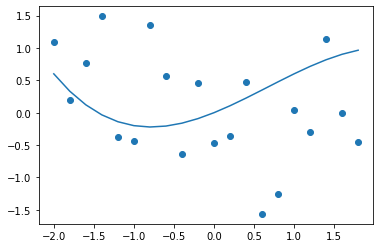

In [99]:
np.random.seed(42)
x = np.arange(-2, 2, 0.2)
noise = np.random.randn(len(x))
y = 0.5 * x + 0.2 * x**2 - 0.1 * x**3
y_obs = y + noise
plt.plot(x, y)
plt.scatter(x, y_obs)
plt.show()

Let's use the Polynomial feature extractor from sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [100]:
from sklearn.preprocessing import PolynomialFeatures

In [101]:
pf = PolynomialFeatures(10)
x_powers = pf.fit_transform(x[:,None])

In [102]:
model = LinearRegression(fit_intercept=False)
model.fit(x_powers, y_obs[:, None])
y_pred = model.predict(x_powers)
model.coef_

array([[-0.26151683, -0.33311422,  2.32510838, -3.55267911, -7.76268587,
         5.76303249,  8.02824027, -2.75182196, -3.07054013,  0.40643481,
         0.39034018]])

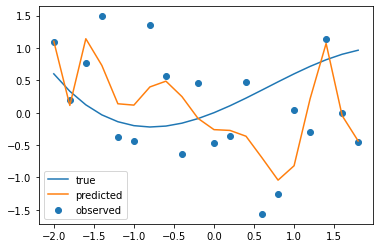

In [103]:
plt.plot(x, y, label="true")
plt.scatter(x, y_obs, label="observed")
plt.plot(x, y_pred, label="predicted")
plt.legend()
plt.show()

In [105]:
model = Ridge(alpha=2, fit_intercept=False)
model.fit(x_powers, y_obs[:, None])
y_pred = model.predict(x_powers)
model.coef_

array([[-0.18214477, -0.38939422, -0.05868914, -0.02942585,  0.14812345,
         0.07610962,  0.22596386,  0.03886093, -0.1276801 , -0.0173321 ,
         0.01447996]])

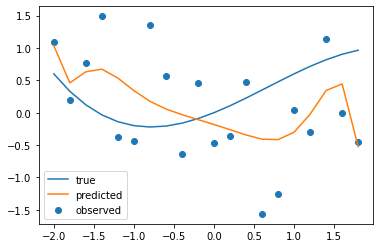

In [106]:
plt.plot(x, y, label="true")
plt.scatter(x, y_obs, label="observed")
plt.plot(x, y_pred, label="predicted")
plt.legend()
plt.show()